In [3]:
# This script illustrates the usage of Logistic Regression for classification. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

# load the data set
# See '2 - Decision Trees' for a description of this data set
iris = load_iris()

In [6]:
# we create an instance of the Classifier
# Logistic Regression (aka logit, MaxEnt) classifier.
clf = linear_model.LogisticRegression(C=1e5)
# c is the inverse of regularization strength; must be a positive float. Like in support vector machines, 
# smaller values specify stronger regularization.
# It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for
# optimal performance; any other input format will be converted (and copied).
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is
# set to ‘ovr’ and uses the cross-entropy loss, if the ‘multi_class’ option is set to ‘multinomial’. 

# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:
clf = clf.fit(iris.data, iris.target)
# The underlying C implementation uses a random number generator to select features when fitting the model.
# It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a
# smaller tol parameter.

# Evaluate performance
print cross_val_score(clf, iris.data, iris.target, cv=10)
# returns an array of scores of the estimator for each run of the cross validation.
# The simplest way to use cross-validation

[ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.86666667  1.          1.          1.        ]


In [8]:
# After being fitted, the model can then be used to predict the class of samples:
print 'The 1st instance is predicted to belong to class:', clf.predict(iris.data[:1, :])

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print 'The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(iris.data[:1, :])

# Try also clf.decision_function(X)
# It predicts confidence scores for samples.
# The confidence score for a sample is the signed distance of that sample to the hyperplane.

The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[  9.24216676e-01   7.57833244e-02   2.33911886e-27]]


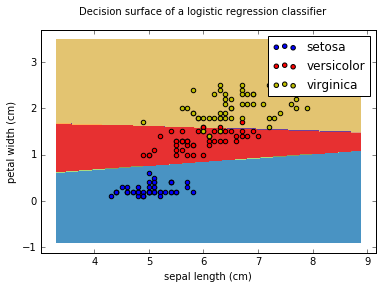

In [9]:
## Decision Boundary Visualization
# Plot the decision surface of the classifier
import numpy as np
import matplotlib.pyplot as plt

# Parameters
featureA, featureB = 0, 3 # select two variables to visualize
plot_colors = "bry"
plot_step = 0.02  # step size in the mesh

X = iris.data[:, [featureA, featureB] ] # We only take the two corresponding features
y = iris.target

n_classes = len(set(y))

# Train
clf = clf.fit(X, y) # we train again the model as we will use only two variables to visualize the decision boundaries

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[featureA])
plt.ylabel(iris.feature_names[featureB])
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

plt.axis("tight")

plt.suptitle("Decision surface of a logistic regression classifier")
plt.legend()
plt.show()

In [ ]:
# You can repeat the above process by selecting different attributes.

# Exercise (3 minutes):
# Plot the decision boundaries of logistic regression using different sets of attributes. 

# ...write your code here...

In [5]:
# Compare the decision boundaries against the ones produced from the other classification methods used in the previous scripts. 